# **Name: Chidiebere Sam-Ogbonna**
## **Project: Data Visualization for Enhancing Process Quality Using Statistical Process Control (SPC) Techniques**


**Objective:** To visualize manufacturing process data using Statistical Process Control (SPC) techniques to identify, monitor, and improve process quality in a polyurethane foam production company.

In [1]:
%pip install GaugeRnR
%pip install seaborn
%pip install folium
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Usage:   
  /opt/conda/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/conda/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/conda/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/conda/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/conda/bin/python -m pip install [options] <archive url/path> ...

no such option: -y
Note: you may need to restart the kernel to use updated packages.


**Created a synthetic dataset using Python.**

In [2]:
import pandas as pd
import numpy as np


np.random.seed(42)

# Parameters
num_samples = 1000

# Generating synthetic data
data = {
    'BatchNumber': np.arange(1, num_samples + 1),
    'Density': np.random.normal(loc=45, scale=5, size=num_samples),
    'Hardness': np.random.normal(loc=70, scale=10, size=num_samples),
    'TensileStrength': np.random.normal(loc=30, scale=5, size=num_samples),
    'Temperature': np.random.normal(loc=150, scale=10, size=num_samples),
    'MixingTime': np.random.normal(loc=5, scale=0.5, size=num_samples),
    'RawMaterialQuality': np.random.choice(['High', 'Medium', 'Low'], size=num_samples, p=[0.6, 0.3, 0.1])
}

df = pd.DataFrame(data)
print(df.head())

df.to_csv('synthetic_polyurethane_foam_data.csv', index=False)


   BatchNumber    Density   Hardness  TensileStrength  Temperature  \
0            1  47.483571  83.993554        26.624109   130.921924   
1            2  44.308678  79.246337        29.277407   141.396150   
2            3  48.238443  70.596304        26.037900   145.863945   
3            4  52.615149  63.530632        28.460192   168.876877   
4            5  43.829233  76.982233        20.531927   155.565531   

   MixingTime RawMaterialQuality  
0    4.568253               High  
1    4.984398               High  
2    5.009008               High  
3    5.236315               High  
4    4.316571               High  


**I loaded and inspected the dataset.**

In [3]:
df = pd.read_csv('synthetic_polyurethane_foam_data.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())


   BatchNumber    Density   Hardness  TensileStrength  Temperature  \
0            1  47.483571  83.993554        26.624109   130.921924   
1            2  44.308678  79.246337        29.277407   141.396150   
2            3  48.238443  70.596304        26.037900   145.863945   
3            4  52.615149  63.530632        28.460192   168.876877   
4            5  43.829233  76.982233        20.531927   155.565531   

   MixingTime RawMaterialQuality  
0    4.568253               High  
1    4.984398               High  
2    5.009008               High  
3    5.236315               High  
4    4.316571               High  
       BatchNumber      Density     Hardness  TensileStrength  Temperature  \
count  1000.000000  1000.000000  1000.000000      1000.000000  1000.000000   
mean    500.500000    45.096660    70.708362        30.029171   149.812808   
std     288.819436     4.896080     9.974544         4.917271    10.271325   
min       1.000000    28.793663    40.596114        14.90

**I performed data cleaning, to ensure that the synthetic data is ready for analysis**

In [4]:
print(df.dtypes)

df['RawMaterialQuality'] = df['RawMaterialQuality'].astype('category')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print(df.info())


BatchNumber             int64
Density               float64
Hardness              float64
TensileStrength       float64
Temperature           float64
MixingTime            float64
RawMaterialQuality     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   BatchNumber         1000 non-null   int64   
 1   Density             1000 non-null   float64 
 2   Hardness            1000 non-null   float64 
 3   TensileStrength     1000 non-null   float64 
 4   Temperature         1000 non-null   float64 
 5   MixingTime          1000 non-null   float64 
 6   RawMaterialQuality  1000 non-null   category
dtypes: category(1), float64(5), int64(1)
memory usage: 48.1 KB
None


**I performed descriptive statistics and visualization.**

       BatchNumber      Density     Hardness  TensileStrength  Temperature  \
count  1000.000000  1000.000000  1000.000000      1000.000000  1000.000000   
mean    500.500000    45.096660    70.708362        30.029171   149.812808   
std     288.819436     4.896080     9.974544         4.917271    10.271325   
min       1.000000    28.793663    40.596114        14.902439   120.705513   
25%     250.750000    41.762048    63.937583        26.760002   142.625795   
50%     500.500000    45.126503    70.630771        29.998746   150.001846   
75%     750.250000    48.239719    77.288822        33.304577   156.669454   
max    1000.000000    64.263657   101.931076        49.631189   182.430930   

        MixingTime  
count  1000.000000  
mean      4.975363  
std       0.496190  
min       3.411648  
25%       4.658698  
50%       4.990879  
75%       5.319562  
max       6.556455  


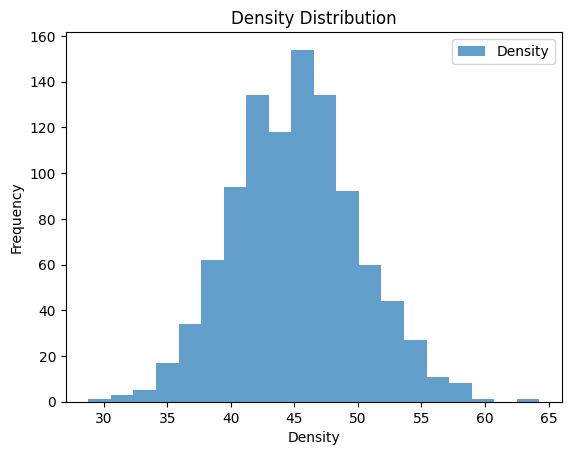

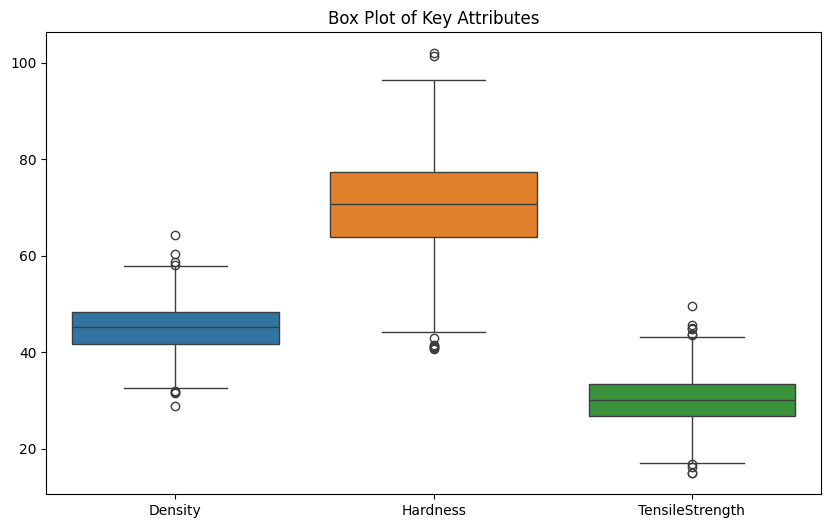

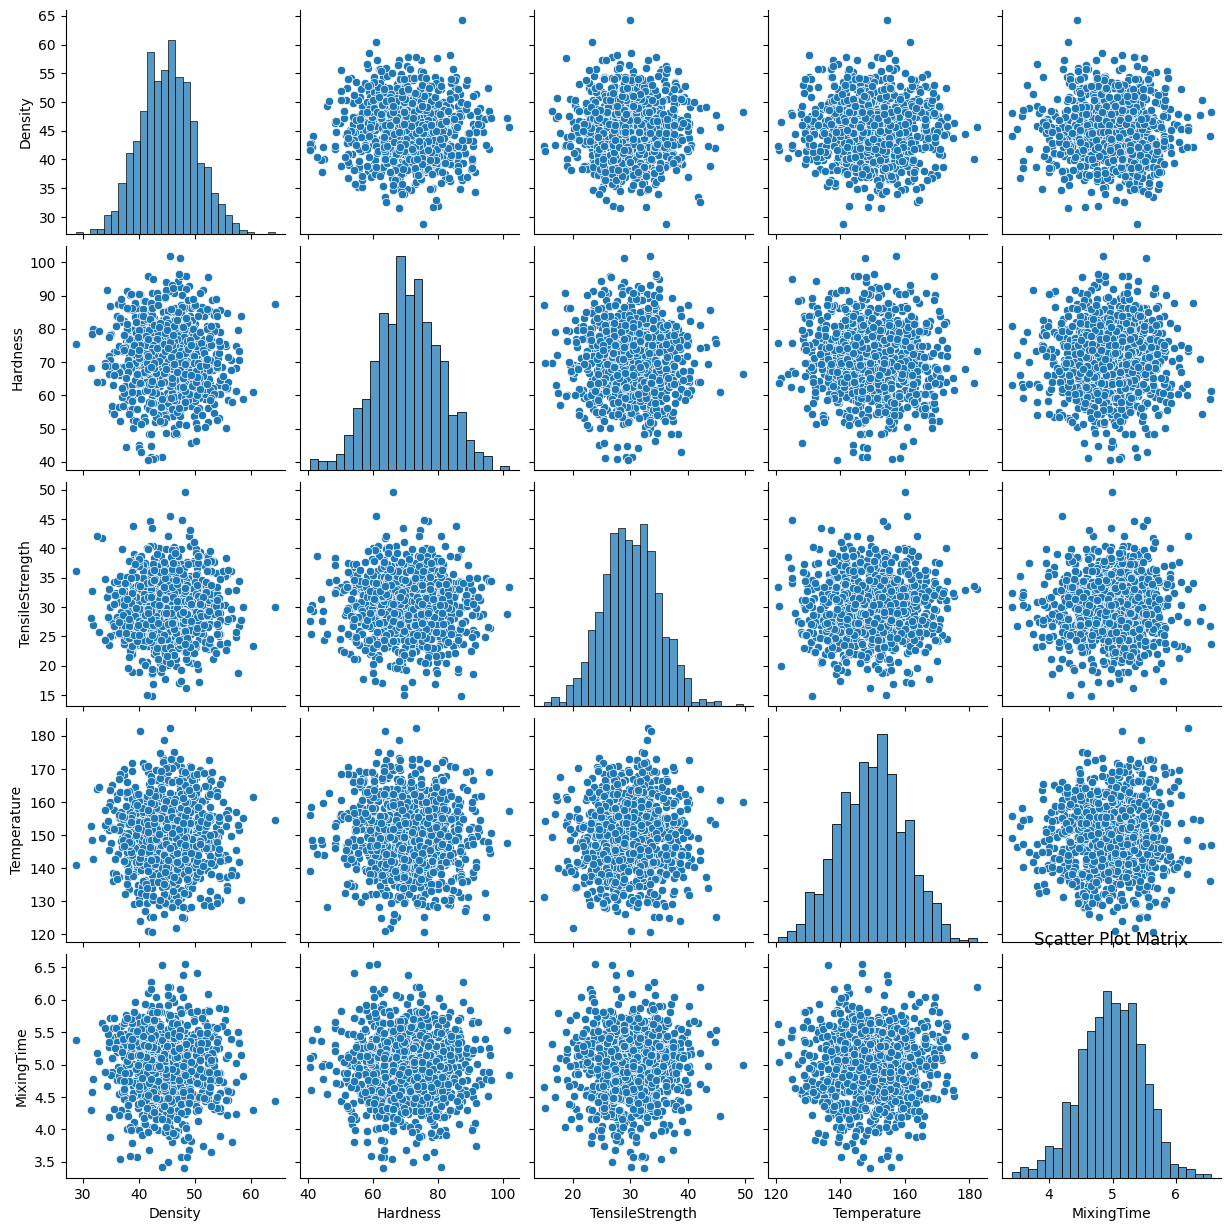

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Data visualization
# Density distribution
plt.hist(df['Density'], bins=20, alpha=0.7, label='Density')
plt.title('Density Distribution')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Density', 'Hardness', 'TensileStrength']])
plt.title('Box Plot of Key Attributes')
plt.show()

# Scatter plot
sns.pairplot(df[['Density', 'Hardness', 'TensileStrength', 'Temperature', 'MixingTime']])
plt.title('Scatter Plot Matrix')
plt.show()


**I created control charts to monitor process stability and perform capability analysis.**

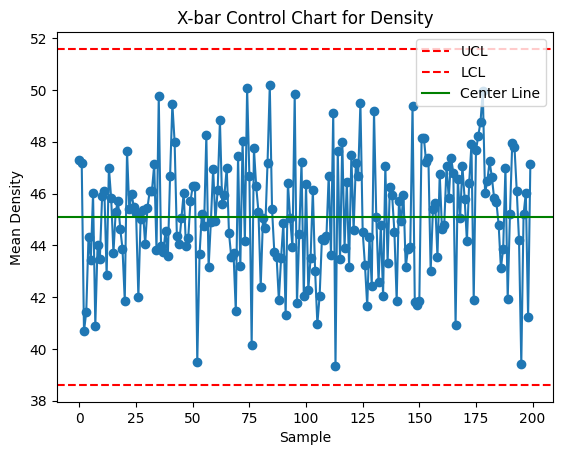

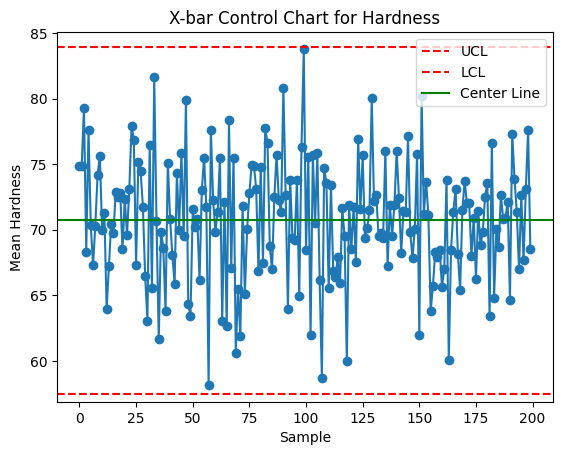

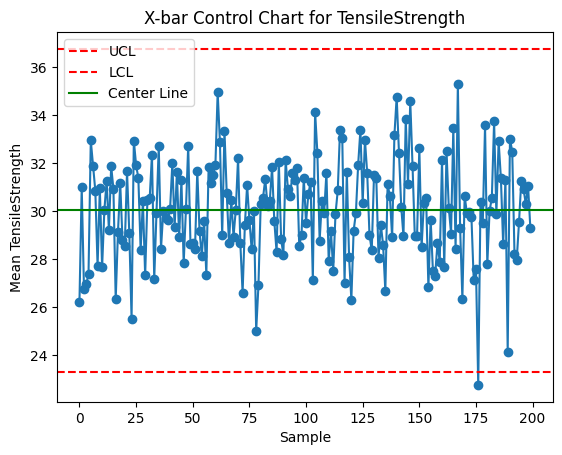

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def create_control_chart(data, sample_size, feature, chart_type='XR'):
    n = sample_size
    if chart_type == 'XR':
        x_bar = data[feature].groupby(data.index // n).mean()
        x_bar_bar = x_bar.mean()
        R = data[feature].groupby(data.index // n).apply(lambda x: x.max() - x.min())
        R_bar = R.mean()

        # Control limits
        A2 = 0.577  # For n=5
        UCL_x_bar = x_bar_bar + A2 * R_bar
        LCL_x_bar = x_bar_bar - A2 * R_bar

        plt.plot(x_bar, marker='o', linestyle='-')
        plt.axhline(y=UCL_x_bar, color='r', linestyle='--', label='UCL')
        plt.axhline(y=LCL_x_bar, color='r', linestyle='--', label='LCL')
        plt.axhline(y=x_bar_bar, color='g', linestyle='-', label='Center Line')
        plt.title(f'X-bar Control Chart for {feature}')
        plt.xlabel('Sample')
        plt.ylabel(f'Mean {feature}')
        plt.legend()
        plt.show()

create_control_chart(df, 5, 'Density', 'XR')
create_control_chart(df, 5, 'Hardness', 'XR')
create_control_chart(df, 5, 'TensileStrength', 'XR')


**I created an X-R control chart with a box plot for the first 20 observations.**

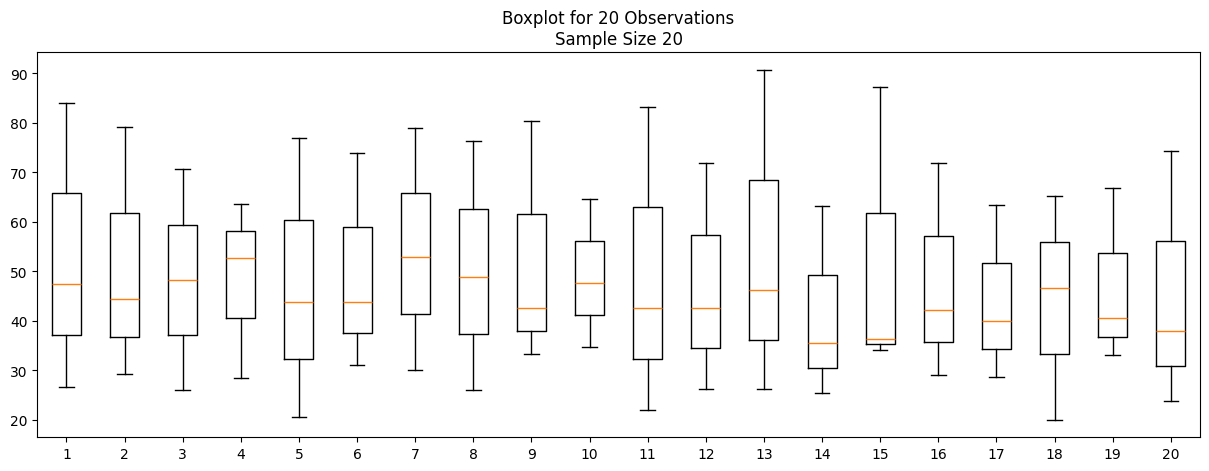

In [7]:
class XR_ControlChart:
    
    def fit(self, df, columns):
        self.sample_size = len(df)
        self.number_of_sample = len(columns)
        self.X = np.zeros((self.number_of_sample, 1))
        self.R = np.zeros((self.number_of_sample, 1))

        for i, col in enumerate(columns):
            self.X[i] = df[col].mean()
            self.R[i] = df[col].max() - df[col].min()
        
        self.data = df[columns].values  # Convert to numpy array
        
    def ControlChart(self, A2, D3, D4):
       
        plt.figure(figsize=(15, 5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data), self.sample_size))
        plt.boxplot(self.data.T)
        plt.show()

# Extract the first 20 observations
df_20 = df.head(20)

control_chart = XR_ControlChart()

columns_of_interest = ['Density', 'Hardness', 'TensileStrength']

control_chart.fit(df_20, columns_of_interest)

A2 = 0.577 
D3 = 0 
D4 = 2.114  

control_chart.ControlChart(A2, D3, D4)


In [8]:
# Process capability indices for Density
USL_density = 50  # Upper specification limit
LSL_density = 40  # Lower specification limit
sigma_density = df['Density'].std()

Cp_density = (USL_density - LSL_density) / (6 * sigma_density)
Cpk_density = min((USL_density - df['Density'].mean()) / (3 * sigma_density), 
                  (df['Density'].mean() - LSL_density) / (3 * sigma_density))

print(f'Cp for Density: {Cp_density}')
print(f'Cpk for Density: {Cpk_density}')


Cp for Density: 0.3404084026174932
Cpk for Density: 0.3338276083757029


**I used techniques like Fishbone Diagrams and correlation analysis to identify potential causes of quality issues.**

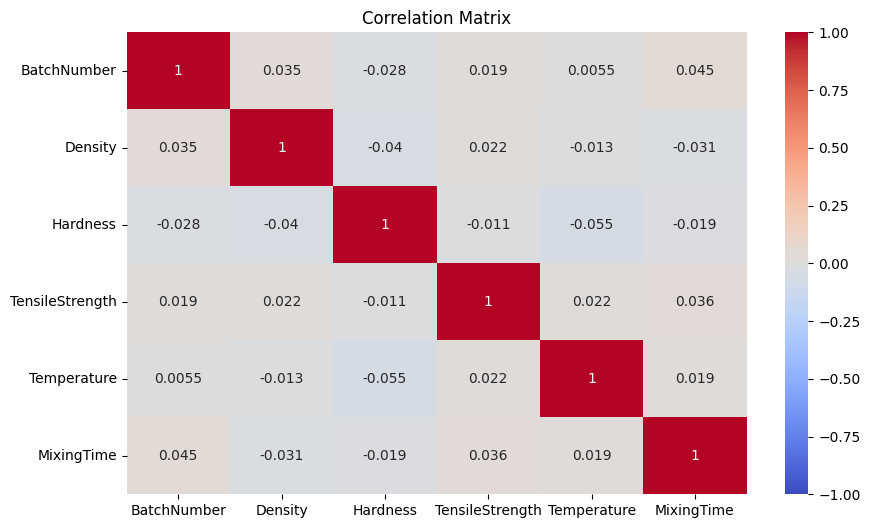

In [9]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

